## Missing values data check
https://www.kaggle.com/noriuk/us-education-datasets-unification-project

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

In [2]:
!pip install psycopg2

In [4]:

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

ed2_df = pd.read_sql_query('SELECT * FROM useducation',con=engine)

In [5]:

ed2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

In [6]:
ed2_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [34]:
# dropping NAN values for TOTAL_REVENUE and TOTAL_EXPENDITURE
ed2_df.dropna(subset=["TOTAL_REVENUE"], inplace=True)
ed2_df.dropna(subset=["TOTAL_EXPENDITURE"], inplace=True)

In [35]:
ed2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1280 entries, 0 to 1285
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1280 non-null   object 
 1   STATE                         1280 non-null   object 
 2   YEAR                          1280 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRADES_P

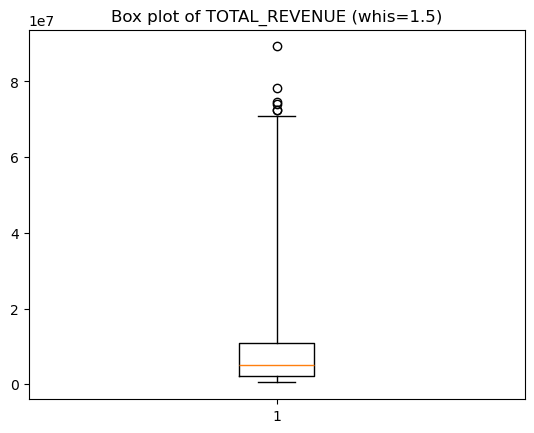

In [46]:
# TOTAL_REVENUE missing value % is 14.209115281501338
# Perform box plot to check outliers in TOTAL_REVENUE 
import matplotlib.pyplot as plt
import numpy as np
plt.boxplot(ed2_df["TOTAL_REVENUE"],whis=7.0)
plt.title("Box plot of TOTAL_REVENUE (whis=1.5)")
plt.show()

0        2653798.0
1         972488.0
2        3401580.0
3        1743022.0
4       27138832.0
           ...    
1281     3729397.0
1282    68282026.0
1283    14207389.0
1284     1963630.0
1285    23352516.0
Name: TOTAL_EXPENDITURE, Length: 1280, dtype: float64


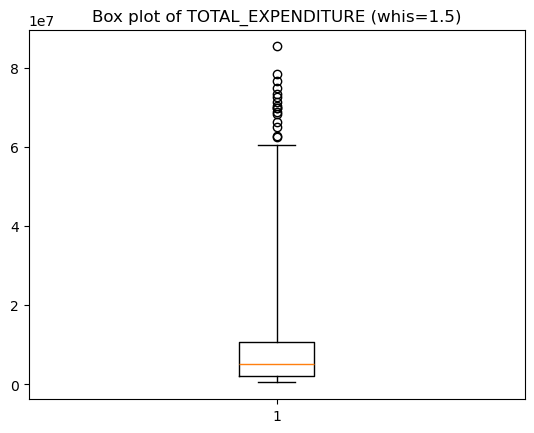

In [43]:
# check if there is any null values 
print(ed2_df["TOTAL_EXPENDITURE"])
plt.boxplot(ed2_df["TOTAL_EXPENDITURE"],whis=6)
plt.title("Box plot of TOTAL_EXPENDITURE (whis=1.5)")
plt.show()

In [61]:
# there are outliers in the data
# apply capping method for TOTAL_REVENUE
from scipy.stats.mstats import winsorize

# Apply one-way winsorization to the highest end
# of the value distribution. Because you have a lot of extreme
# values, set the values of the outliers to the 
# value of the ninetieth percentile. 
ed2_df["CAPPED_TOTAL_REVENUE"] = winsorize(ed2_df["TOTAL_REVENUE"], (0, 0.10))

ed2_df["CAPPED_TOTAL_REVENUE"]

ed2_df["CAPPED_TOTAL_EXPENDITURE"] = winsorize(ed2_df["TOTAL_EXPENDITURE"], (0, 0.10))

ed2_df["CAPPED_TOTAL_EXPENDITURE"]


0        2653798.0
1         972488.0
2        3401580.0
3        1743022.0
4       21896220.0
           ...    
1281     3729397.0
1282    21896220.0
1283    14207389.0
1284     1963630.0
1285    21896220.0
Name: CAPPED_TOTAL_EXPENDITURE, Length: 1280, dtype: float64

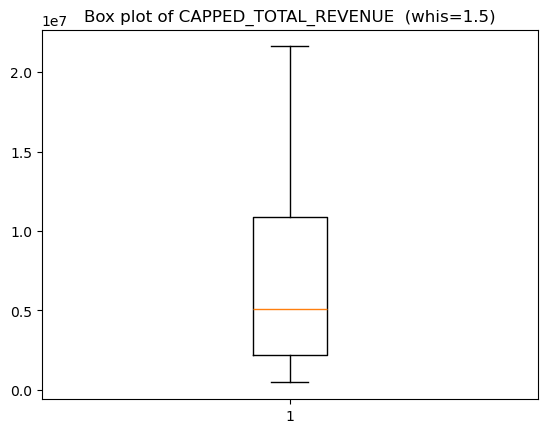

In [62]:
plt.boxplot(ed2_df["CAPPED_TOTAL_REVENUE"])
plt.title("Box plot of CAPPED_TOTAL_REVENUE  (whis=1.5)")
plt.show()

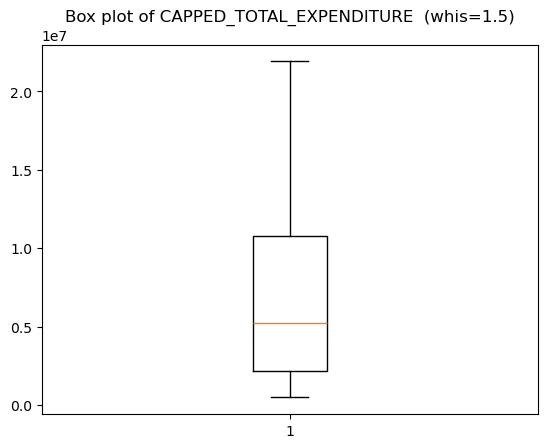

In [63]:
plt.boxplot(ed2_df["CAPPED_TOTAL_EXPENDITURE"])
plt.title("Box plot of CAPPED_TOTAL_EXPENDITURE  (whis=1.5)")
plt.show()

In [70]:
ed2_df['TOTAL_DEFICIT'] = ed2_df['TOTAL_REVENUE'] - ed2_df['TOTAL_EXPENDITURE']
ed2_df["TOTAL_DEFICIT"]
ed2_df['TOTAL_DEFICIT_CAPPED'] = ed2_df['CAPPED_TOTAL_REVENUE'] - ed2_df['CAPPED_TOTAL_EXPENDITURE']
ed2_df["TOTAL_DEFICIT_CAPPED"]

0        25087.0
1        77103.0
2      -143501.0
3       -31063.0
4      -272297.0
          ...   
1281     35672.0
1282   -272297.0
1283   -759344.0
1284   -174881.0
1285   -272297.0
Name: TOTAL_DEFICIT_CAPPED, Length: 1280, dtype: float64

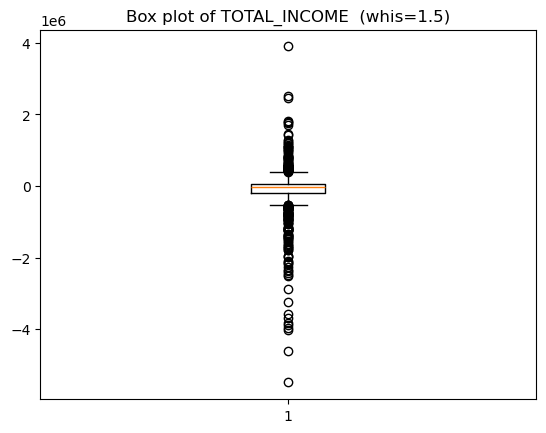

In [71]:
plt.boxplot(ed2_df["TOTAL_DEFICIT"])
plt.title("Box plot of TOTAL_DEFICIT  (whis=1.5)")
plt.show()

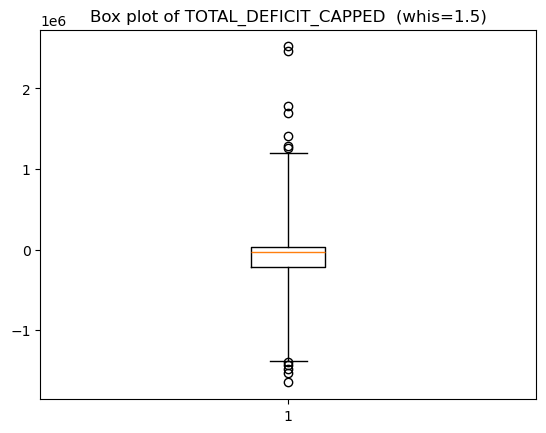

In [79]:
plt.boxplot(ed2_df["TOTAL_DEFICIT_CAPPED"],whis=4.5)
plt.title("Box plot of TOTAL_DEFICIT_CAPPED  (whis=1.5)")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


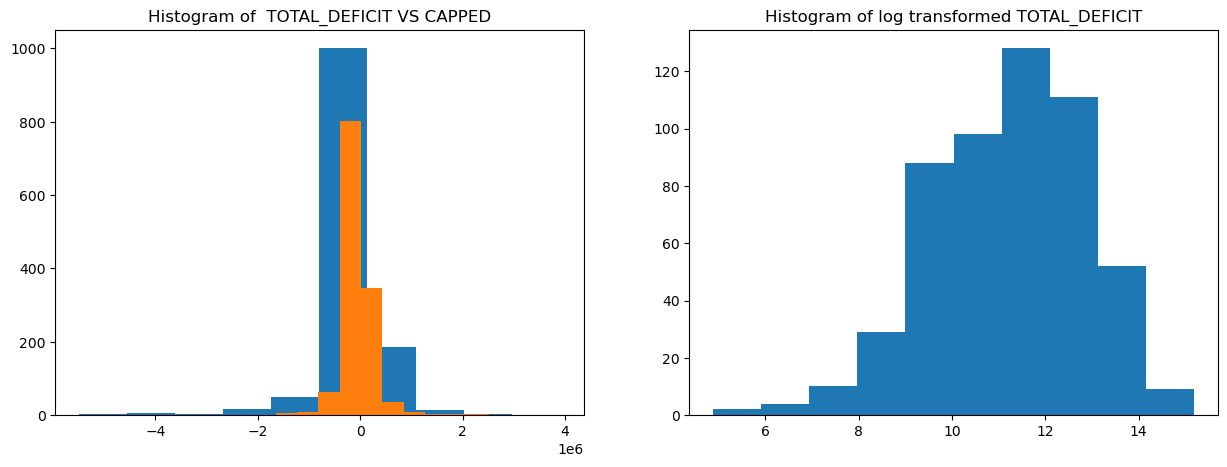

In [81]:
#  tRANSFORM OUTLIER FOR DEFICIT
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(ed2_df["TOTAL_DEFICIT"])
plt.title("Histogram of  TOTAL_DEFICIT VS CAPPED")

plt.subplot(1,2,1)
plt.hist(ed2_df["TOTAL_DEFICIT_CAPPED"])

plt.subplot(1,2,2)
plt.hist(np.log(ed2_df["TOTAL_DEFICIT"]))
plt.title("Histogram of log transformed TOTAL_DEFICIT")
plt.show()

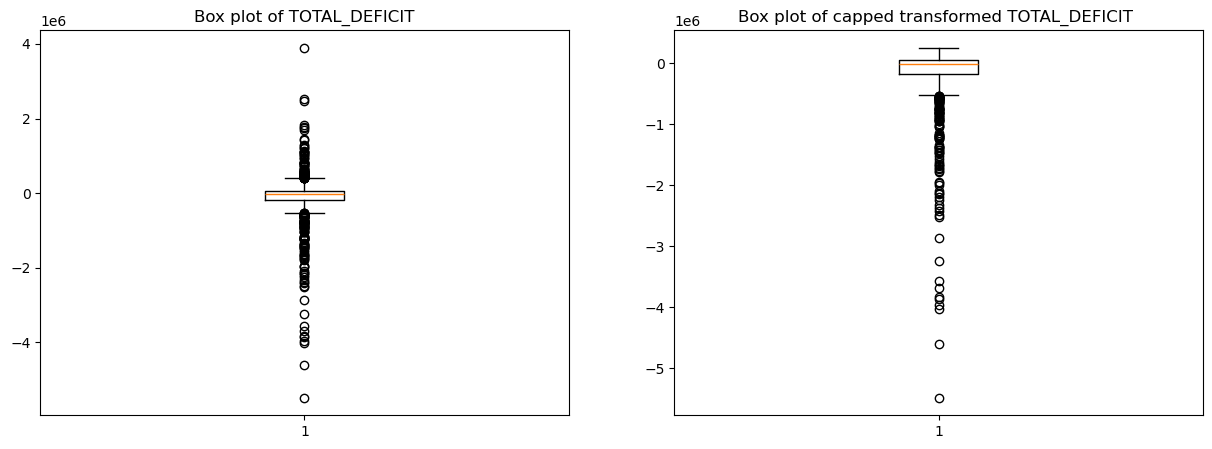

In [84]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(ed2_df["TOTAL_DEFICIT"])
plt.title("Box plot of TOTAL_DEFICIT")
# log transformation is not handling negetive values 
plt.subplot(1,2,2)
plt.boxplot(winsorize(ed2_df["TOTAL_DEFICIT"], (0, 0.10)))
plt.title("Box plot of capped transformed TOTAL_DEFICIT ")
plt.show()